In [43]:
import pandas as pd
from catboost import CatBoostClassifier, Pool

from modeling import simple_split, calculate_class_weights

In [44]:
train_df = pd.read_csv('train_df.csv')

### 1.1 Modeling

In [45]:
target_df = pd.read_csv('1_sec_target.csv')

In [46]:
(X_train, Y_train), (X_test, Y_test) = simple_split(train_df, target_df, fraction=0.8)
(X_train, Y_train), (X_val, Y_val) = simple_split(X_train, Y_train, fraction=0.8)
X_train.shape, X_val.shape, X_test.shape

((443948, 42), (110987, 42), (138734, 42))

In [47]:
print("Train positive fraction:", Y_train.mean())
print("Validation positive fraction:", Y_val.mean()) 
print("Test positive fraction:", Y_test.mean())

Train positive fraction: 1_sec    0.649355
dtype: float64
Validation positive fraction: 1_sec    0.597511
dtype: float64
Test positive fraction: 1_sec    0.597914
dtype: float64


In [49]:
train_pool = Pool(data=X_train, label=Y_train)
val_pool = Pool(data=X_val, label=Y_val)

In [50]:
class_weights_dict = calculate_class_weights(Y_train)

In [51]:
model_d3 = CatBoostClassifier(
    iterations=5000,
    eval_metric='AUC',
    use_best_model=True,
    depth=3,
    learning_rate=0.05,
    loss_function='Logloss',
    class_weights=class_weights_dict,
)

model_d4 = CatBoostClassifier(
    iterations=5000,
    eval_metric='AUC',
    use_best_model=True,
    depth=4,
    loss_function='Logloss',
    class_weights=class_weights_dict,
)

model_d5 = CatBoostClassifier(
    iterations=5000,
    eval_metric='AUC',
    use_best_model=True,
    depth=5,
    learning_rate=0.05,
    loss_function='Logloss',
    class_weights=class_weights_dict,
)

In [52]:
model_d3.fit(
    train_pool,
    eval_set=val_pool,
    early_stopping_rounds=500,
)

0:	test: 0.5692110	best: 0.5692110 (0)	total: 87.5ms	remaining: 7m 17s
1:	test: 0.5736866	best: 0.5736866 (1)	total: 124ms	remaining: 5m 8s
2:	test: 0.5797284	best: 0.5797284 (2)	total: 154ms	remaining: 4m 16s
3:	test: 0.6013477	best: 0.6013477 (3)	total: 200ms	remaining: 4m 9s
4:	test: 0.6090555	best: 0.6090555 (4)	total: 227ms	remaining: 3m 46s
5:	test: 0.6157396	best: 0.6157396 (5)	total: 251ms	remaining: 3m 28s
6:	test: 0.6151899	best: 0.6157396 (5)	total: 273ms	remaining: 3m 14s
7:	test: 0.6148506	best: 0.6157396 (5)	total: 300ms	remaining: 3m 7s
8:	test: 0.6154437	best: 0.6157396 (5)	total: 337ms	remaining: 3m 6s
9:	test: 0.6151485	best: 0.6157396 (5)	total: 360ms	remaining: 2m 59s
10:	test: 0.6144285	best: 0.6157396 (5)	total: 387ms	remaining: 2m 55s
11:	test: 0.6157136	best: 0.6157396 (5)	total: 414ms	remaining: 2m 51s
12:	test: 0.6152803	best: 0.6157396 (5)	total: 438ms	remaining: 2m 48s
13:	test: 0.6149746	best: 0.6157396 (5)	total: 463ms	remaining: 2m 44s
14:	test: 0.6171863

In [53]:
model_d4.fit(
    train_pool,
    eval_set=val_pool,
    early_stopping_rounds=500
)

Learning rate set to 0.070917
0:	test: 0.5806153	best: 0.5806153 (0)	total: 42.6ms	remaining: 3m 33s
1:	test: 0.6061598	best: 0.6061598 (1)	total: 70.2ms	remaining: 2m 55s
2:	test: 0.6066544	best: 0.6066544 (2)	total: 96.4ms	remaining: 2m 40s
3:	test: 0.6068911	best: 0.6068911 (3)	total: 124ms	remaining: 2m 35s
4:	test: 0.6112916	best: 0.6112916 (4)	total: 149ms	remaining: 2m 29s
5:	test: 0.6159372	best: 0.6159372 (5)	total: 171ms	remaining: 2m 22s
6:	test: 0.6181559	best: 0.6181559 (6)	total: 191ms	remaining: 2m 16s
7:	test: 0.6251562	best: 0.6251562 (7)	total: 213ms	remaining: 2m 13s
8:	test: 0.6250197	best: 0.6251562 (7)	total: 240ms	remaining: 2m 13s
9:	test: 0.6253554	best: 0.6253554 (9)	total: 263ms	remaining: 2m 11s
10:	test: 0.6269752	best: 0.6269752 (10)	total: 294ms	remaining: 2m 13s
11:	test: 0.6263327	best: 0.6269752 (10)	total: 320ms	remaining: 2m 12s
12:	test: 0.6264173	best: 0.6269752 (10)	total: 350ms	remaining: 2m 14s
13:	test: 0.6265435	best: 0.6269752 (10)	total: 373

In [54]:
model_d5.fit(
    train_pool,
    eval_set=val_pool,
    early_stopping_rounds=500
)

0:	test: 0.5915700	best: 0.5915700 (0)	total: 99.3ms	remaining: 8m 16s
1:	test: 0.5918340	best: 0.5918340 (1)	total: 160ms	remaining: 6m 39s
2:	test: 0.5990997	best: 0.5990997 (2)	total: 214ms	remaining: 5m 56s
3:	test: 0.6081594	best: 0.6081594 (3)	total: 277ms	remaining: 5m 45s
4:	test: 0.6151125	best: 0.6151125 (4)	total: 340ms	remaining: 5m 40s
5:	test: 0.6142270	best: 0.6151125 (4)	total: 406ms	remaining: 5m 37s
6:	test: 0.6154122	best: 0.6154122 (6)	total: 464ms	remaining: 5m 30s
7:	test: 0.6216907	best: 0.6216907 (7)	total: 515ms	remaining: 5m 21s
8:	test: 0.6227885	best: 0.6227885 (8)	total: 550ms	remaining: 5m 4s
9:	test: 0.6251446	best: 0.6251446 (9)	total: 587ms	remaining: 4m 52s
10:	test: 0.6252390	best: 0.6252390 (10)	total: 625ms	remaining: 4m 43s
11:	test: 0.6244846	best: 0.6252390 (10)	total: 662ms	remaining: 4m 35s
12:	test: 0.6258622	best: 0.6258622 (12)	total: 702ms	remaining: 4m 29s
13:	test: 0.6337492	best: 0.6337492 (13)	total: 759ms	remaining: 4m 30s
14:	test: 0.

In [55]:
not_active_X = X_test[~X_test.active_area].reset_index(drop='index')
not_active_Y = Y_test[~X_test.active_area].reset_index(drop='index')
not_active_pool = Pool(data=not_active_X, label=not_active_Y)
not_active_Y.value_counts()

1_sec
False    1961
True     1296
Name: count, dtype: int64

In [56]:
passive_X = X_test[X_test.passive_area].reset_index(drop='index')
passive_Y = Y_test[X_test.passive_area].reset_index(drop='index')
passive_pool = Pool(data=passive_X, label=passive_Y)
passive_Y.value_counts()

1_sec
True     1268
False     974
Name: count, dtype: int64

In [57]:
active_X = X_test[X_test.active_area].reset_index(drop='index')
active_Y = Y_test[X_test.active_area].reset_index(drop='index')
active_pool = Pool(data=active_X, label=active_Y)
active_Y.value_counts()

1_sec
True     81655
False    53822
Name: count, dtype: int64

In [58]:
from metrics import calculate_metrics

AUC: 0.8446
AP: 0.6973
Precision: 0.7132
Recall: 0.3472


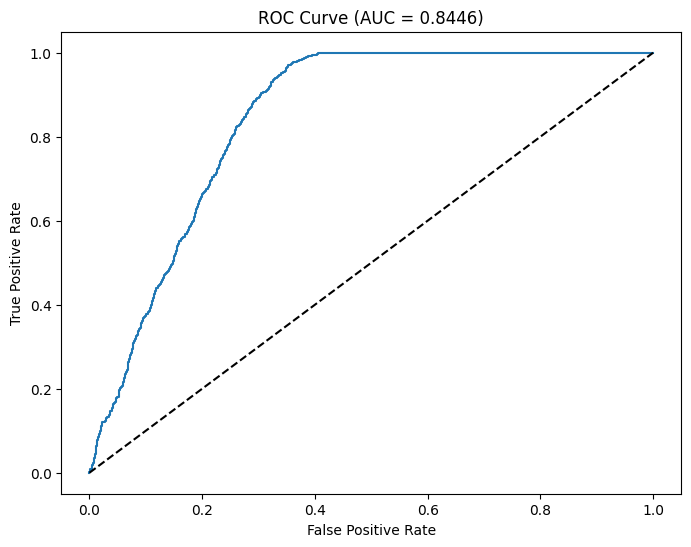

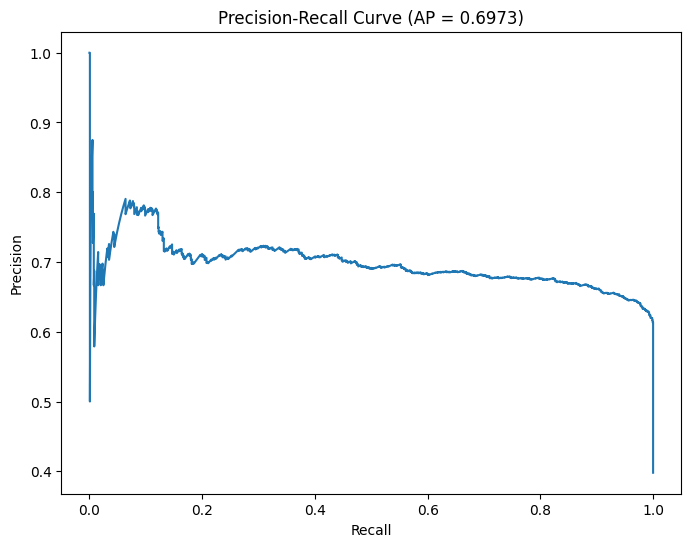

In [59]:
calculate_metrics(model_d5, not_active_pool, 'metrics/modeling_1_sec_momentum/not_active')

AUC: 0.6983
AP: 0.6985
Precision: 0.7103
Recall: 0.3596


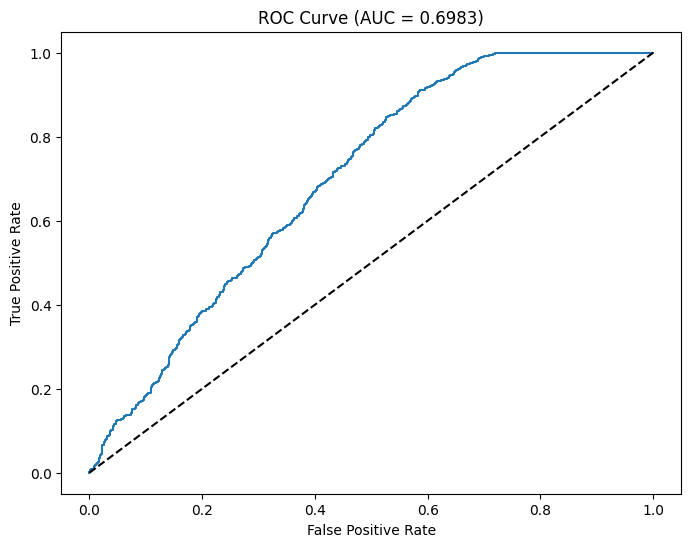

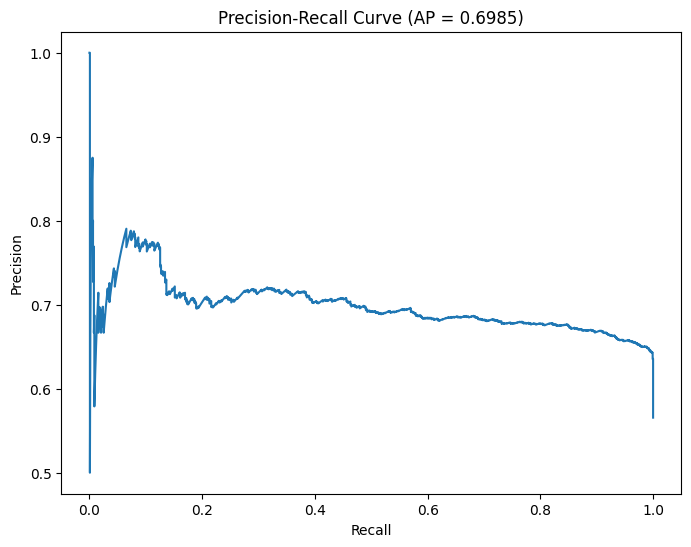

In [60]:
calculate_metrics(model_d5, passive_pool, 'metrics/modeling_1_sec_momentum/passive')

AUC: 0.6432
AP: 0.7097
Precision: 0.6734
Recall: 0.7595


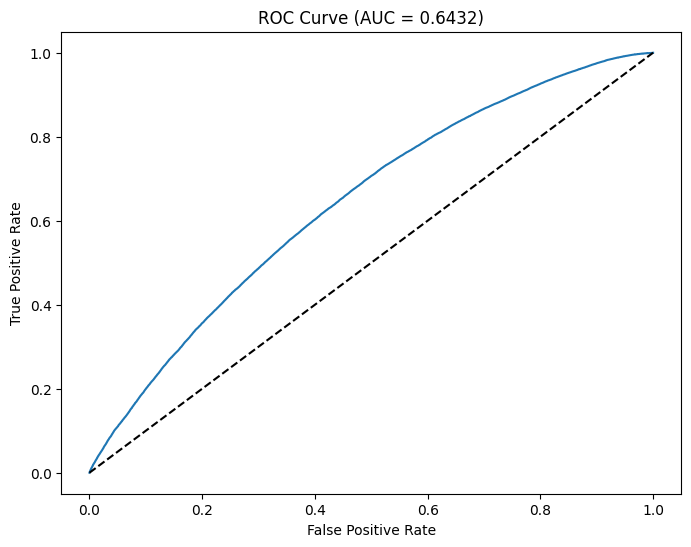

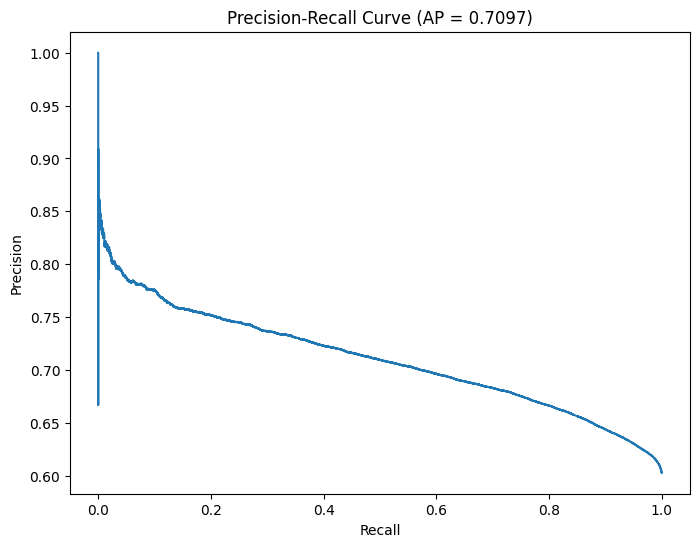

In [61]:
calculate_metrics(model_d5, active_pool, 'metrics/modeling_1_sec_momentum/active')

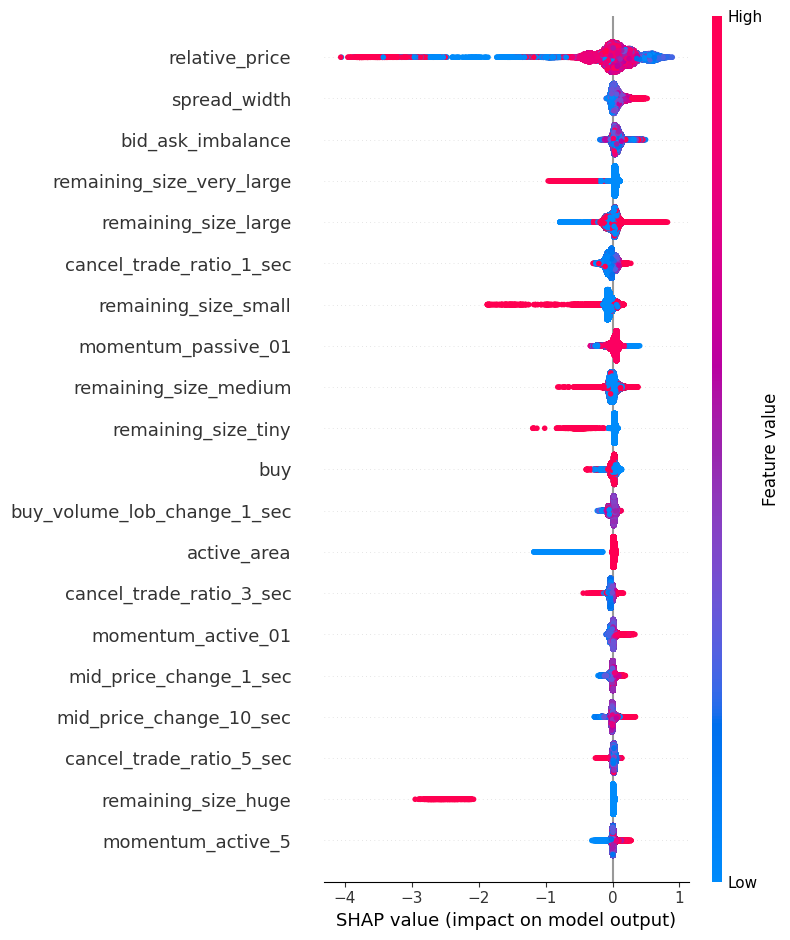

/home/lbringerl/workspace/experiments/.eda/lib/python3.12/site-packages/numpy/_core/_methods.py:191: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


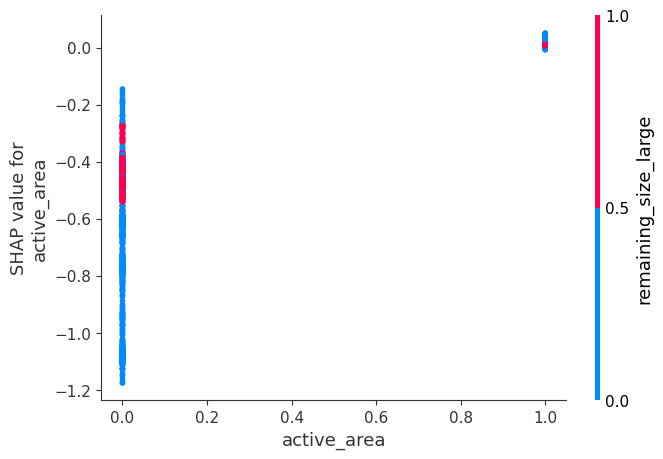

/home/lbringerl/workspace/experiments/.eda/lib/python3.12/site-packages/numpy/_core/_methods.py:191: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


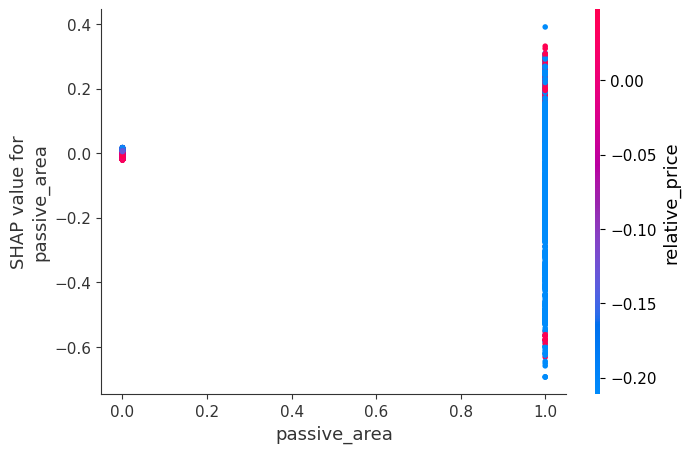

In [64]:
import shap

# Calculate SHAP values for a sample of the test data
explainer = shap.TreeExplainer(model_d5)
shap_values = explainer.shap_values(X_test)

# Create summary plot
shap.summary_plot(shap_values, X_test)

# Create dependence plots for top features
shap.dependence_plot("active_area", shap_values, X_test)
shap.dependence_plot("passive_area", shap_values, X_test)


In [65]:
import numpy as np

# Get feature names
feature_names = X_test.columns

# Create a DataFrame with feature names and their mean absolute SHAP values
shap_importance = pd.DataFrame({
    'Feature': feature_names,
    'SHAP Value': np.abs(shap_values).mean(axis=0)
})

# Sort by absolute SHAP value in descending order
shap_importance = shap_importance.sort_values('SHAP Value', ascending=False)

# Display all features and their SHAP values
print("Feature SHAP Values:")
print(shap_importance)


Feature SHAP Values:
                          Feature  SHAP Value
2                  relative_price    0.233502
14                   spread_width    0.075691
3               bid_ask_imbalance    0.067008
41      remaining_size_very_large    0.066374
37           remaining_size_large    0.064679
4        cancel_trade_ratio_1_sec    0.061647
39           remaining_size_small    0.061136
30            momentum_passive_01    0.051004
38          remaining_size_medium    0.047301
40            remaining_size_tiny    0.042796
35                            buy    0.037185
20    buy_volume_lob_change_1_sec    0.033544
0                     active_area    0.031219
6        cancel_trade_ratio_3_sec    0.028409
25             momentum_active_01    0.027203
9          mid_price_change_1_sec    0.024663
13        mid_price_change_10_sec    0.022922
7        cancel_trade_ratio_5_sec    0.022286
36            remaining_size_huge    0.021252
29              momentum_active_5    0.020437
8       cance